In [5]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats

In [6]:
####################  1. Regression with Daily Return   ###################################

In [7]:
pf_size = pd.read_csv('C:/Users/yzou/Desktop/Portfolios_Formed_on_ME_daily.csv')
ff5 = pd.read_csv('C:/Users/yzou/Desktop/F-F_Research_Data_5_Factors_2x3_daily.csv')

In [8]:
pf_size.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
pf_size_excess=(pf_size.iloc[:,1:pf_size.shape[1]]).sub(ff5.RF,axis=0)

In [9]:
ff5['YYMM'] = pd.to_datetime(ff5['YYMM'],yearfirst=True, format='%Y%m%d')
pf_size_excess['YYMM'] = pd.to_datetime(pf_size['YYMM'],yearfirst=True, format='%Y%m%d')


ff5.index = ff5['YYMM']
pf_size_excess.index = pf_size_excess['YYMM']
ff5 = ff5.drop('YYMM', axis = 1)
ff5 = ff5.drop('RF', axis = 1)

In [10]:
start = ff5.index[0]
end = ff5.index[ff5.shape[0]-1]
n_day = end - start
print(n_day.days)
print(ff5.shape[0])
#because there are weekends and public holidays, we use every 126 records as a proxy of every 6-month window\n",
#There are in total 14075 records, thus will have 14075 - 126 + 1 =  13950 windows\n",
window = 126
n_window = ff5.shape[0] - 126 + 1
print(n_window)

20423
14075
13950


In [11]:
#To run OLS on a 6-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 13950 models are for the portfolio Lo 30,\n",
#the next 13950 models are for the portfolio Med 40\n",
pf_3 = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]
models_3_pf = []
for i in range (3):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_3[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_3_pf.append(reg.fit())

In [12]:
print(window)
window_nm = []
for i in range(n_window):
    nm = ff5.index[i+int(window/2)]
    window_nm.append(nm)
print(len(window_nm))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

126
13950
Index(['Lo 30', 'Med 40', 'Hi 30'], dtype='object')


In [13]:
Rsquare_3_pf = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models_3_pf[i*n_window +n].rsquared) 
    Rsquare_3_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

In [14]:
pf_5 = pf_size_excess.loc[:,['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
models_5_pf = []
for i in range (5):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_5[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_5_pf.append(reg.fit())

In [15]:
Rsquare_5_pf = {}
for i in range(5):
    x = []
    for n in range(n_window):  
        x.append(models_5_pf[i*n_window +n].rsquared) 
    Rsquare_5_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

In [17]:
pf_10 = pf_size_excess.loc[:,['Lo 10', '2-Dec', '3-Dec','4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec','9-Dec', 'Hi 10']]
models_10_pf = []
for i in range (10):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_10[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_10_pf.append(reg.fit())

In [18]:
Rsquare_10_pf = {}
for i in range(10):
    x = []
    for n in range(n_window):  
        x.append(models_10_pf[i*n_window +n].rsquared) 
    Rsquare_10_pf["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

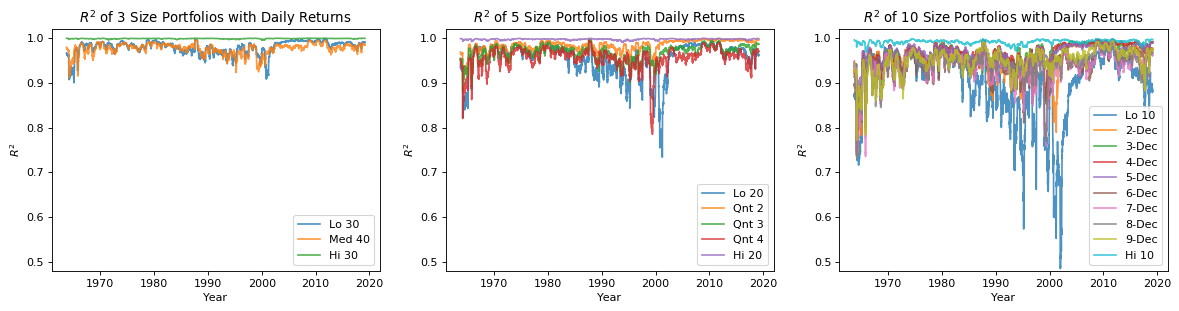

In [34]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(Rsquare_3_pf['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('$R^2$ of 3 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('$R^2$')

plt.subplot(1, 3, 2)
plt.plot(Rsquare_5_pf['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('$R^2$ of 5 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('$R^2$')

plt.subplot(1, 3, 3)
plt.plot(Rsquare_10_pf['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('$R^2$ of 10 Size Portfolios with Daily Returns')
plt.xlabel('Year')
plt.ylabel('$R^2$')
plt.savefig('R Square of Daily Return by Portfolio.png')
plt.show()

In [21]:
####################  2. Regression with Monthly Return   ###################################

In [22]:
pf_size_mm = pd.read_csv('C:/Users/yzou/Desktop/Portfolios_Formed_on_ME_monthly.csv')
ff5_mm = pd.read_csv('C:/Users/yzou/Desktop/F-F_Research_Data_5_Factors_2x3_monthly.csv')

In [23]:
pf_size_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5_mm.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [24]:
pf_size_excess_mm=(pf_size_mm.iloc[:,1:pf_size_mm.shape[1]]).sub(ff5_mm.RF,axis=0)
ff5_mm['YYMM'] = pd.to_datetime(ff5_mm['YYMM'],yearfirst=True, format='%Y%m')
pf_size_excess_mm['YYMM'] = pd.to_datetime(pf_size_mm['YYMM'],yearfirst=True, format='%Y%m')

In [25]:
ff5_mm.index = ff5_mm['YYMM']
pf_size_excess_mm.index = pf_size_excess_mm['YYMM']
ff5_mm = ff5_mm.drop('YYMM', axis = 1)
ff5_mm = ff5_mm.drop('RF', axis = 1)

In [26]:
#use 10 year window (number of obs will be close to daily models with half-year window)
start_mm = ff5_mm.index[0]
end_mm = ff5_mm.index[ff5_mm.shape[0]-1]
n_month = end_mm - start_mm
print(ff5_mm.shape[0])
window_mm = 120
n_window_mm = ff5_mm.shape[0] - window_mm + 1
print(n_window_mm)
print(end_mm)

671
552
2019-05-01 00:00:00


In [27]:
print(window_mm)
window_nm_month = []
for i in range(n_window_mm):
    nm = ff5_mm.index[i+int(window_mm/2)]
    window_nm_month.append(nm)
print(len(window_nm_month))
portfolio_nm_3 = pf_size_excess.columns[1:4]
print(portfolio_nm_3)

120
552
Index(['Lo 30', 'Med 40', 'Hi 30'], dtype='object')


In [28]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_3_mm = pf_size_excess_mm.loc[:,['Lo 30','Med 40','Hi 30']]
models_3_pf_mm = []
for i in range (3):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_3_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_3_pf_mm.append(reg.fit())

In [29]:
Rsquare_3_pf_mm = {}
for i in range(3):
    x = []
    for n in range(n_window_mm):  
        x.append(models_3_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_3_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [30]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_5_mm = pf_size_excess_mm.loc[:,['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
models_5_pf_mm = []
for i in range (5):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_5_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_5_pf_mm.append(reg.fit())

In [31]:
Rsquare_5_pf_mm = {}
for i in range(5):
    x = []
    for n in range(n_window_mm):  
        x.append(models_5_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_5_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

In [32]:
#To run OLS on a 120-month rolling window basis. The logic of this loop is to run the rolling window regressions \n",
#for each of the 3 portfolios. That is, the first 552 models are for the portfolio Lo 30,\n",
#the next 552 models are for the portfolio Med 40\n",
pf_10_mm = pf_size_excess_mm.loc[:,['Lo 10', '2-Dec', '3-Dec','4-Dec', '5-Dec', '6-Dec', '7-Dec', '8-Dec','9-Dec', 'Hi 10']]
models_10_pf_mm = []
for i in range (10):
    for m in range(n_window_mm):
        
        t0 = ff5_mm.index[0+m]
        if ff5_mm.index[0+m+window_mm-1] < end_mm:
            t1 = ff5_mm.index[0+m+window_mm-1]
        else:
            t1 = end_mm
        
        x = ff5_mm[t0:t1]
        x = sm.add_constant(x)
        y = pf_10_mm[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)   
        models_10_pf_mm.append(reg.fit())

In [33]:
Rsquare_10_pf_mm = {}
for i in range(10):
    x = []
    for n in range(n_window_mm):  
        x.append(models_10_pf_mm[i*n_window_mm +n].rsquared) 
    Rsquare_10_pf_mm["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm_month)

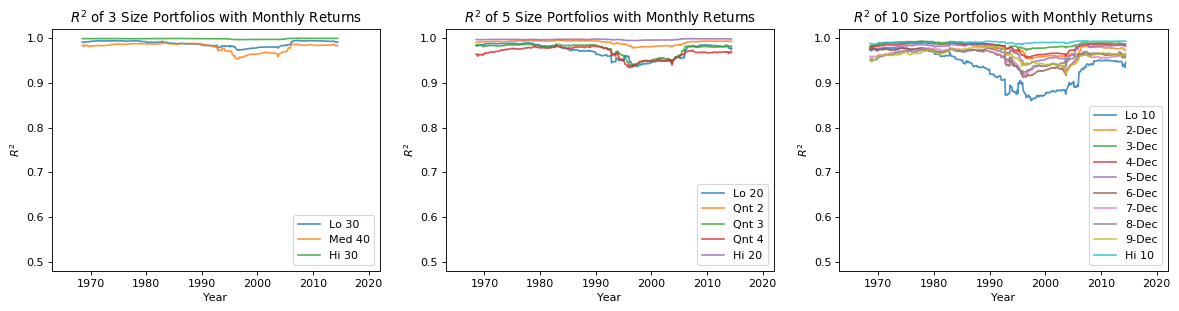

In [36]:
fig=plt.figure(figsize=(18, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(Rsquare_3_pf_mm['Portfoio0'],label="Lo 30",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio1'],label="Med 40",alpha=0.8)
plt.plot(Rsquare_3_pf_mm['Portfoio2'],label="Hi 30",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.xlim(["1963","2022"])
plt.title('$R^2$ of 3 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.ylabel('$R^2$')
# plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Rsquare_5_pf_mm['Portfoio0'],label="Lo 20",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio1'],label="Qnt 2",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio2'],label="Qnt 3",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio3'],label="Qnt 4",alpha=0.8)
plt.plot(Rsquare_5_pf_mm['Portfoio4'],label="Hi 20",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('$R^2$ of 5 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.xlim(["1963","2022"])
plt.ylabel('$R^2$')
# plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Rsquare_10_pf_mm['Portfoio0'],label="Lo 10",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio1'],label="2-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio2'],label="3-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio3'],label="4-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio4'],label="5-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio5'],label="6-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio6'],label="7-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio7'],label="8-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio8'],label="9-Dec",alpha=0.8)
plt.plot(Rsquare_10_pf_mm['Portfoio9'],label="Hi 10",alpha=0.8)
plt.legend(loc='lower right')
plt.ylim([0.48,1.02])
plt.title('$R^2$ of 10 Size Portfolios with Monthly Returns')
plt.xlabel('Year')
plt.xlim(["1963","2022"])
plt.ylabel('$R^2$')
# plt.xticks(rotation=90)
plt.savefig('R Square of Monthly Return by Portfolio.png')
plt.show()

In [37]:
####################  3. Factor Correlations with Monthly Return   ###################################

In [38]:
correlation = []
for m in range(n_window_mm):
    t0 = ff5_mm.index[0+m]
    if ff5_mm.index[0+m+window_mm-1] < end_mm:
        t1 = ff5_mm.index[0+m+window_mm-1]
    else:
        t1 = end_mm
    correlation.append(ff5_mm[t0:t1].corr())

In [39]:
Mrk_SMB = []
Mrk_HML = []
Mrk_RMW = []
Mrk_CMA = []
SMB_HML = []
SMB_RMW = []
SMB_CMA = []
HML_RMW = []
HML_CMA = []
RMW_CMA = []
for i in range(len(correlation)):
    Mrk_SMB.append(correlation[i].iloc[0][1])
    Mrk_HML.append(correlation[i].iloc[0][2])
    Mrk_RMW.append(correlation[i].iloc[0][3])
    Mrk_CMA.append(correlation[i].iloc[0][4])
    SMB_HML.append(correlation[i].iloc[1][2])
    SMB_RMW.append(correlation[i].iloc[1][3])
    SMB_CMA.append(correlation[i].iloc[1][4])
    HML_RMW.append(correlation[i].iloc[2][3])
    HML_CMA.append(correlation[i].iloc[2][4])
    RMW_CMA.append(correlation[i].iloc[3][4])
    
Mrk_SMB_Corr = pd.Series(Mrk_SMB,index = window_nm_month)
Mrk_HML_Corr = pd.Series(Mrk_HML,index = window_nm_month)  
Mrk_RMW_Corr = pd.Series(Mrk_RMW,index = window_nm_month)  
Mrk_CMA_Corr = pd.Series(Mrk_CMA,index = window_nm_month)  
SMB_HML_Corr = pd.Series(SMB_HML,index = window_nm_month)  
SMB_RMW_Corr = pd.Series(SMB_RMW,index = window_nm_month)  
SMB_CMA_Corr = pd.Series(SMB_CMA,index = window_nm_month)  
HML_RMW_Corr = pd.Series(HML_RMW,index = window_nm_month)  
HML_CMA_Corr = pd.Series(HML_CMA,index = window_nm_month)  
RMW_CMA_Corr = pd.Series(RMW_CMA,index = window_nm_month)

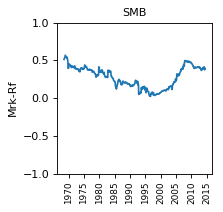

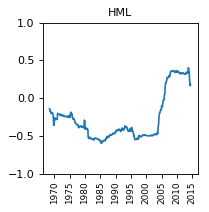

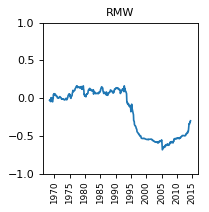

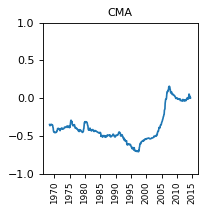

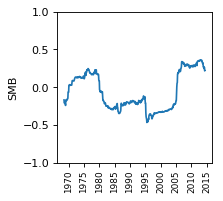

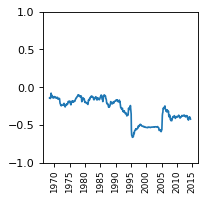

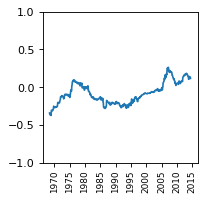

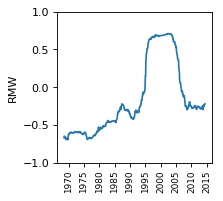

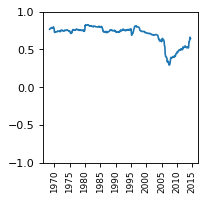

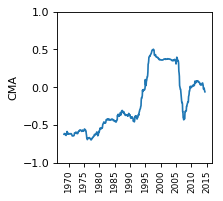

In [55]:
fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(Mrk_SMB_Corr)
plt.title('SMB', fontsize=10)
plt.ylabel('Mrk-Rf', fontsize=10)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 11.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Mrk_HML_Corr)
plt.title('HML', fontsize=10)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 12.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Mrk_RMW_Corr)
plt.title('RMW', fontsize=10)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 13.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(Mrk_CMA_Corr)
plt.title('CMA', fontsize=10)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 14.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(SMB_HML_Corr)
plt.ylabel('SMB', fontsize=10)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 22.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(SMB_RMW_Corr)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 23.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(SMB_CMA_Corr)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 24.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(HML_RMW_Corr)
plt.xticks(fontsize=8,rotation=90)
plt.ylabel('RMW', fontsize=10)
plt.ylim([-1,1])
plt.savefig('Corr 33.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(HML_CMA_Corr)
plt.xticks(fontsize=8,rotation=90)
plt.ylim([-1,1])
plt.savefig('Corr 34.png')
plt.show()

fig = plt.figure(figsize=(2.5, 2.5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(RMW_CMA_Corr)
plt.xticks(fontsize=8,rotation=90)
plt.ylabel('CMA', fontsize=10)
plt.ylim([-1,1])
plt.savefig('Corr 44.png')
plt.show()


In [45]:
####################  4. Factor Significance in Daily Return ###################################

In [56]:
lo_30_p = {}
Med_40_p = {}
Hi_30_p = {}

factor = ['Const', 'Mrk-Rf', 'SMB', 'HML', 'RMW', 'CMA']

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf)/3)):            
        x.append(models_3_pf[i].pvalues[j])
    lo_30_p[factor[j]] = pd.Series(x, index = window_nm)

for j in range(6):
    x= []
    for i in range(int(len(models_3_pf)/3)-1, 2*int(len(models_3_pf)/3)-1):            
        x.append(models_3_pf[i].pvalues[j])
    Med_40_p[factor[j]] = pd.Series(x, index=window_nm)
    
for j in range(6):
    x= []
    for i in range(2*int(len(models_3_pf)/3)-1, len(models_3_pf)-1):            
        x.append(models_3_pf[i].pvalues[j])
    Hi_30_p[factor[j]] = pd.Series(x, index = window_nm)

lo_30_p_summary = pd.concat([lo_30_p[factor[1]],lo_30_p[factor[2]],lo_30_p[factor[3]],lo_30_p[factor[4]],lo_30_p[factor[5]]], axis=1)
Med_40_p_summary = pd.concat([Med_40_p[factor[1]],Med_40_p[factor[2]],Med_40_p[factor[3]],Med_40_p[factor[4]],Med_40_p[factor[5]]], axis=1)
Hi_30_p_summary = pd.concat([Hi_30_p[factor[1]],Hi_30_p[factor[2]],Hi_30_p[factor[3]],Hi_30_p[factor[4]],Hi_30_p[factor[5]]], axis=1)

In [57]:
lo_30_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[0]]
lo_30_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[1]]
lo_30_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[2]]
lo_30_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[3]]
lo_30_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in lo_30_p_summary[4]]

Med_40_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[0]]
Med_40_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[1]]
Med_40_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[2]]
Med_40_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[3]]
Med_40_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Med_40_p_summary[4]]

Hi_30_p_summary['Mrk-Rf Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[0]]
Hi_30_p_summary['SMB Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[1]]
Hi_30_p_summary['HML Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[2]]
Hi_30_p_summary['RMW Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[3]]
Hi_30_p_summary['CMA Ind'] = [1 if x < 0.05 else 0 for x in Hi_30_p_summary[4]]

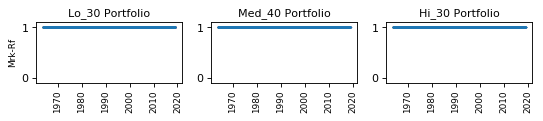

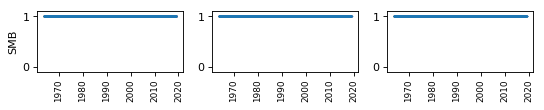

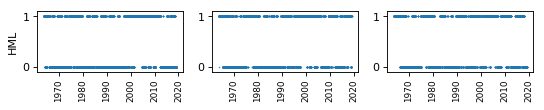

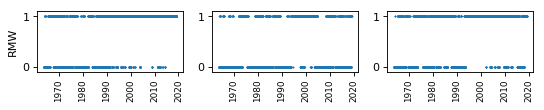

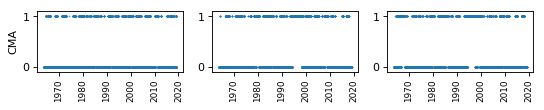

In [67]:
fig=plt.figure(figsize=(8, 1), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(lo_30_p_summary['Mrk-Rf Ind'],'o',markersize = 0.3,label="Mrk",alpha=0.8)
plt.title('Lo_30 Portfolio',fontsize=10)
plt.ylabel('Mrk-Rf',fontsize=8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)


plt.subplot(1, 3, 2)
plt.plot(Med_40_p_summary['Mrk-Rf Ind'],'o',markersize = 0.3, label="Mrk",alpha=0.8)
plt.title('Med_40 Portfolio',fontsize=10)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)


plt.subplot(1, 3, 3)
plt.plot(Hi_30_p_summary['Mrk-Rf Ind'],'o',markersize = 0.3, label="Mrk",alpha=0.8)
plt.title('Hi_30 Portfolio',fontsize=10)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.savefig('Significance 1.png')
plt.show()

####################################################################################
fig=plt.figure(figsize=(8, 1), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(lo_30_p_summary['SMB Ind'],'o',markersize = 0.3,label="SMB",alpha=0.8)
plt.ylabel('SMB',fontsize=10)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Med_40_p_summary['SMB Ind'],'o',markersize = 0.3,label="SMB",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Hi_30_p_summary['SMB Ind'],'o',markersize = 0.3,label="SMB",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.savefig('Significance 2.png')
plt.show()
####################################################################################
fig=plt.figure(figsize=(8, 1), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(lo_30_p_summary['HML Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylabel('HML',fontsize=10)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Med_40_p_summary['HML Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Hi_30_p_summary['HML Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.savefig('Significance 3.png')
plt.show()
####################################################################################
fig=plt.figure(figsize=(8, 1), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(lo_30_p_summary['RMW Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylabel('RMW',fontsize=10)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Med_40_p_summary['RMW Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Hi_30_p_summary['RMW Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.savefig('Significance 4.png')
plt.show()
####################################################################################
fig=plt.figure(figsize=(8, 1), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(lo_30_p_summary['CMA Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylabel('CMA',fontsize=10)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 2)
plt.plot(Med_40_p_summary['CMA Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)

plt.subplot(1, 3, 3)
plt.plot(Hi_30_p_summary['CMA Ind'],'o',markersize = 0.5,label="HML",alpha=0.8)
plt.ylim([-0.1,1.1])
plt.yticks(np.arange(0, 1.1, step=1))
plt.xticks(fontsize=8,rotation=90)
plt.savefig('Significance 5.png')
plt.show()

